# Transformers for classification

imports

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

### load the datasetr

In [19]:
# load the imdb dataset
max_features = 10000 # Use top 10,000 words
maxlen = 100 # Use only the first 100 words in each review

# load the data and labels
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# pad Sequences to ensure consistent input size
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
# processed data in imdb so no need to preprocess it

In [4]:
x_train.shape

(25000, 100)

## Create the transformer block

In [10]:
# transformer block definition
def transformer_block(inputs, num_heads, ff_dim, dropout_rate):
    # Multi-head self-attention
    attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(inputs, inputs)
    attention_output = layers.Dropout(dropout_rate)(attention_output)
    attention_output = layers.LayerNormalization(epsilon=1e-6)(inputs + attention_output)

    ## Feed-forwrd Netork
    ffn_output = layers.Dense(ff_dim, activation='relu')(attention_output)
    ffn_output = layers.Dense(inputs.shape[-1])(ffn_output)
    ffn_output = layers.Dropout(dropout_rate)(ffn_output)
    output = layers.LayerNormalization(epsilon=1e-6)(attention_output + ffn_output)

    return output

How n_heads Works
Splitting Dimensions:

Suppose the input vector dimension is
𝑑
model
=
512
d
model
​
 =512, and
𝑛
heads
=
8
n
heads
​
 =8.
The model splits the input into
8
8 smaller subspaces, each of size
𝑑
𝑘
=
𝑑
model
𝑛
heads
=
64
d
k
​
 =
n
heads
​

d
model
​

​
 =64.
Each head focuses on a different projection of the input data.
Independent Attention Mechanisms:

Each attention head computes its own scaled dot-product attention:
Attention
(
𝑄
,
𝐾
,
𝑉
)
=
softmax
(
𝑄
𝐾
𝑇
𝑑
𝑘
)
𝑉
Attention(Q,K,V)=softmax(
d
k
​

​

QK
T

​
 )V
Concatenation:

After computing attention scores for all
𝑛
heads
n
heads
​
 , the outputs are concatenated back together into a single matrix of size
𝑑
model
d
model
​
 .
The concatenated result is passed through a linear transformation to combine the information from all heads.


## complete the model

In [11]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [12]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

In [21]:
def create_transformer_model(input_shape, num_heads = 2, ff_dim = 64, drop_rate = 0.1):
  inputs = layers.Input(shape = input_shape)

  # Embedding layer
  x = layers.Embedding(input_dim = max_features, output_dim = ff_dim)(inputs)

  # Apply transformer block
  x = transformer_block(x, num_heads, ff_dim, drop_rate)

  #Global average pooling
  x = layers.GlobalAveragePooling1D()(x)

  # Dense layer for binary classififcation
  x = layers.Dense(64, activation = 'relu')(x)
  x = layers.Dropout(drop_rate)(x)
  x = layers.Dense(1, activation = 'sigmoid')(x)

  model =  models.Model(inputs = inputs, outputs = x)
  model.compile(optimizer = Adam(learning_rate = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

  return model


In [22]:
model = create_transformer_model(input_shape=(maxlen,))

In [23]:
from keras.utils import plot_model

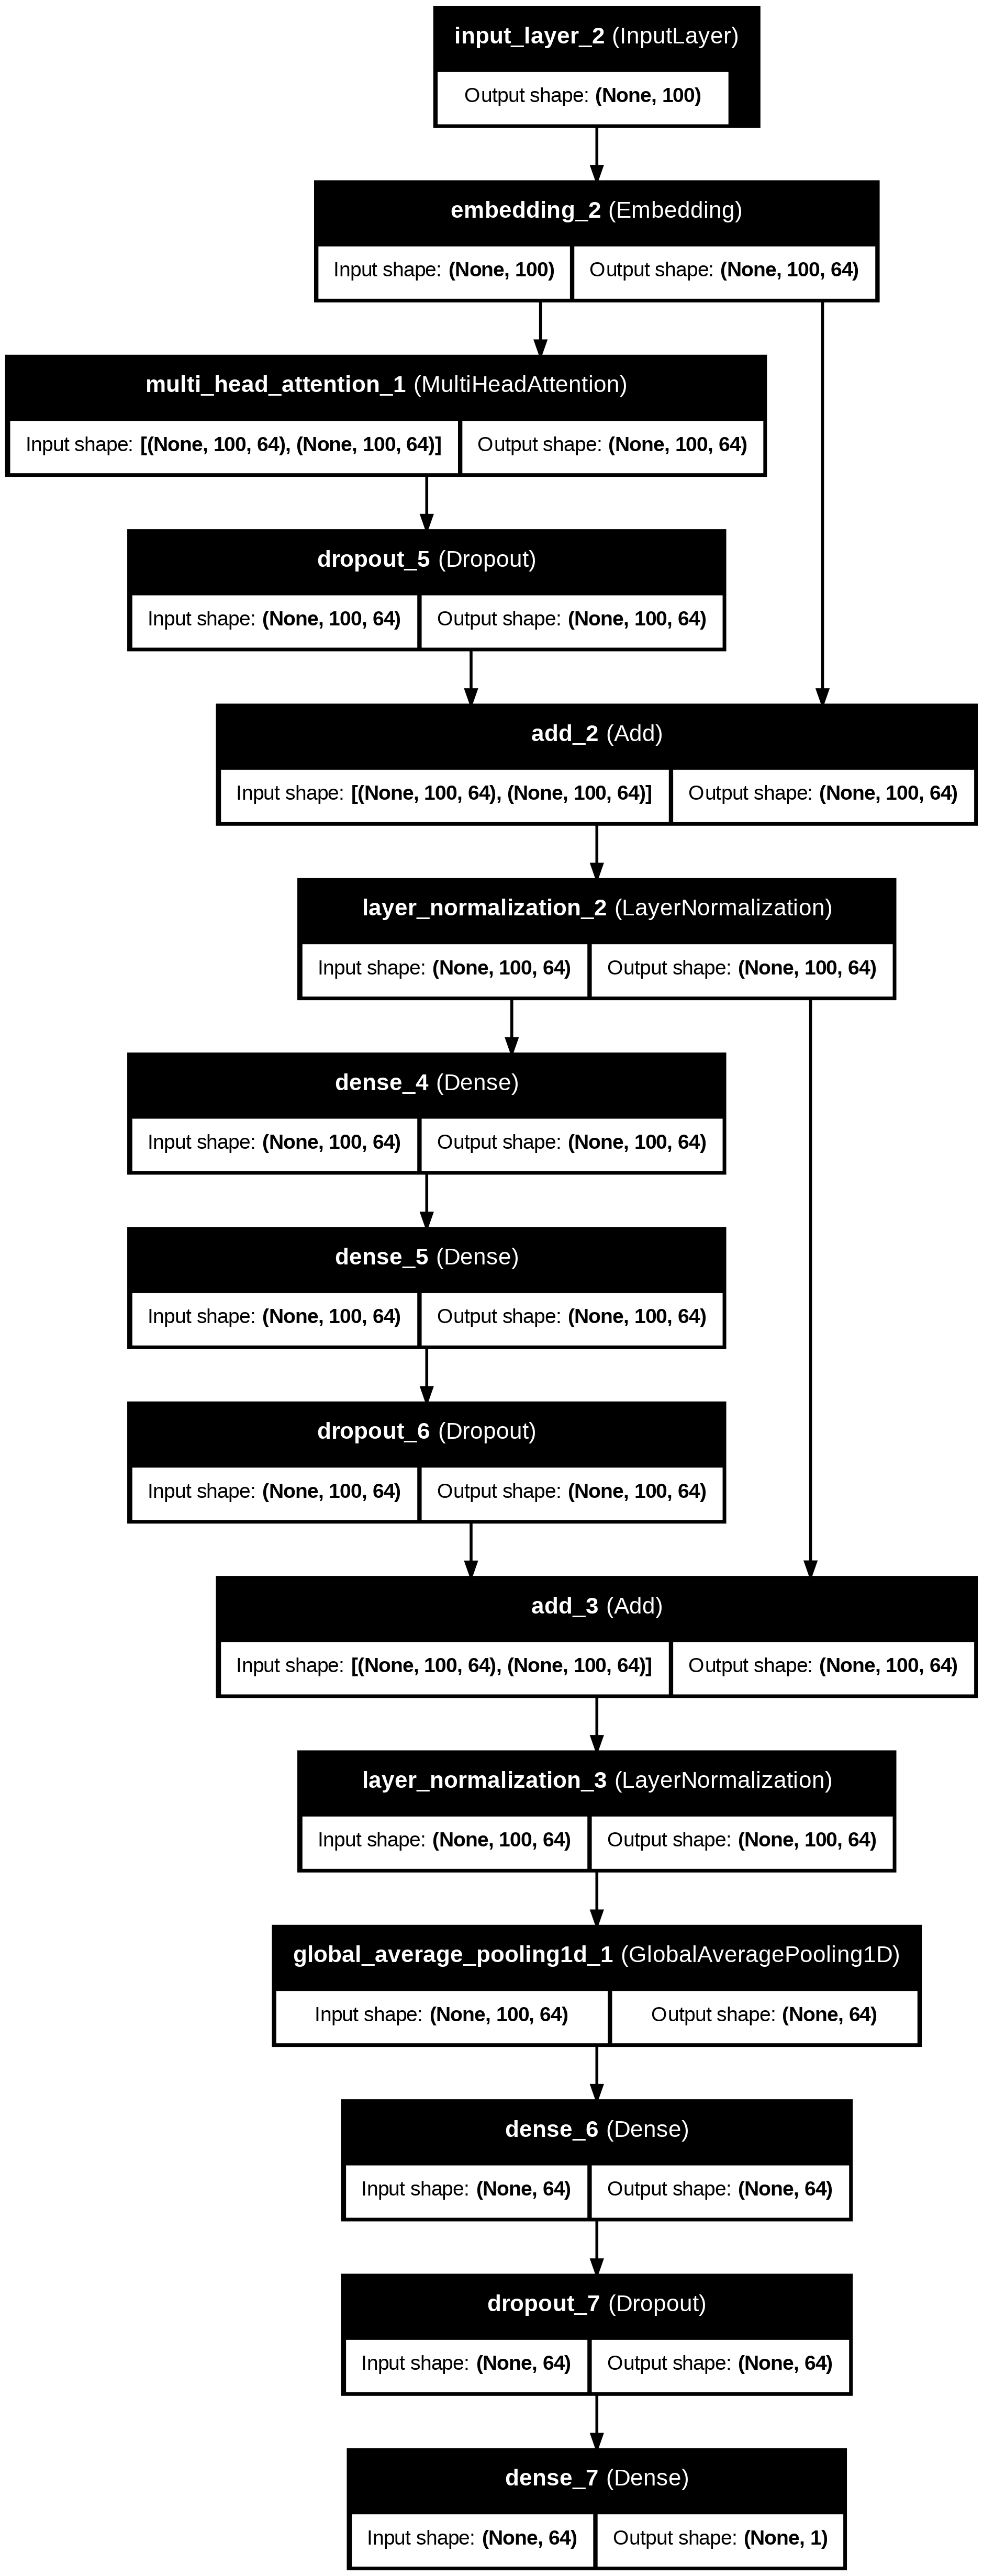

In [24]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [26]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 117ms/step - accuracy: 0.7183 - loss: 0.5586 - val_accuracy: 0.8400 - val_loss: 0.3560
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 109ms/step - accuracy: 0.8764 - loss: 0.2955 - val_accuracy: 0.8324 - val_loss: 0.3801
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 108ms/step - accuracy: 0.9113 - loss: 0.2332 - val_accuracy: 0.8432 - val_loss: 0.3743
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 116ms/step - accuracy: 0.9265 - loss: 0.2026 - val_accuracy: 0.8378 - val_loss: 0.3937
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 112ms/step - accuracy: 0.9401 - loss: 0.1739 - val_accuracy: 0.8167 - val_loss: 0.4683
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 110ms/step - accuracy: 0.9470 - loss: 0.1611 - val_accuracy: 0.8252 - val_loss: 0.4630
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 111ms/step - accuracy: 0.9553 - loss: 0.1386 - val_accuracy: 0.8266 - val_loss: 0.4829
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 109ms/step - accuracy: 0.9582 - lo

In [27]:
## evaluate the model on the test set

In [32]:
import pandas as pd

<Axes: >

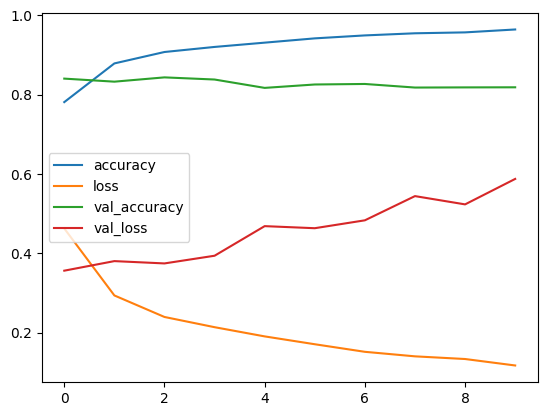

In [33]:
loss_df = pd.DataFrame(history.history)
loss_df.plot()

In [28]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.8182 - loss: 0.5827
Test Accuracy: 81.82%
